**GRIP @THE SPARK FOUNDATION(DATA SCIENEC & BUSINESS ANALYTICS) TASK-2**


In [13]:
import pandas as pd
import numpy as np
import io

In [16]:
from google.colab import files
uploaded=files.upload()

Saving driver.csv to driver.csv


In [17]:
data=pd.read_csv(io.BytesIO(uploaded['driver.csv']))
print(data)

              id  mean_dist_day  mean_over_speed_perc
0     3423311935          71.24                    28
1     3423313212          52.53                    25
2     3423313724          64.54                    27
3     3423311373          55.69                    22
4     3423310999          54.58                    25
...          ...            ...                   ...
3995  3423310685         160.04                    10
3996  3423312600         176.17                     5
3997  3423312921         170.91                    12
3998  3423313630         176.14                     5
3999  3423311533         168.03                     9

[4000 rows x 3 columns]


In [18]:
from sklearn.cluster import KMeans

In [20]:
kmeans = KMeans(n_clusters=4)

In [21]:
kmeans.fit(data)

KMeans(n_clusters=4)

In [22]:
kmeans.cluster_centers_

array([[3.42331295e+09, 7.37599095e+01, 1.08008048e+01],
       [3.42331095e+09, 7.76256987e+01, 1.01714569e+01],
       [3.42331395e+09, 7.48278278e+01, 1.09309309e+01],
       [3.42331196e+09, 7.79272645e+01, 1.09869739e+01]])

In [23]:
kmeans.labels_

array([3, 0, 2, ..., 0, 2, 3], dtype=int32)

In [24]:
import numpy as np

In [25]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)

In [26]:
dict_data = dict(zip(unique, counts))
dict_data

{0: 996, 1: 1006, 2: 998, 3: 1000}

In [27]:
import seaborn as sns

In [28]:
data["cluster"] = kmeans.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


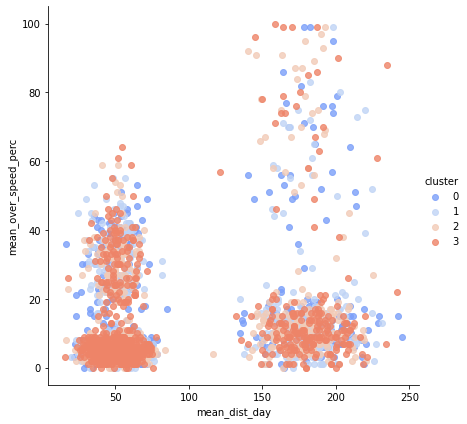

In [29]:
sns.lmplot('mean_dist_day', 'mean_over_speed_perc', data=data, hue='cluster', palette='coolwarm', size=6, aspect=1, fit_reg=False)

In [30]:
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

kmeans.inertia_

345524908.7485695

In [31]:
kmeans.score

<bound method KMeans.score of KMeans(n_clusters=4)>

In [32]:
data

,id,mean_dist_day,mean_over_speed_perc,cluster
0,3423311935,71.24,28,3
1,3423313212,52.53,25,0
2,3423313724,64.54,27,2
3,3423311373,55.69,22,1
4,3423310999,54.58,25,1
...,...,...,...,...
3995,3423310685,160.04,10,1
3996,3423312600,176.17,5,0
3997,3423312921,170.91,12,0
3998,3423313630,176.14,5,2
